In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv("C:/Users/hp/Desktop/Datasets/LoanTrain.csv")
df_test=pd.read_csv("C:/Users/hp/Desktop/Datasets/LoanTest.csv")

In [4]:
df=df_train.copy()

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_train.shape

(614, 13)

In [9]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_train.drop("Loan_ID",axis=1,inplace=True)

In [11]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
categorical_columns=[i for i in df_train.columns if df_train[i].dtype=="object"]

In [13]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [14]:
for i in categorical_columns[1:]:
    print(i)
    print(df_train[i].value_counts())
    print()

Married
Yes    398
No     213
Name: Married, dtype: int64

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64



In [15]:
df_train["Gender"].fillna(df_train["Gender"].mode()[0], inplace=True)
df_train["Married"].fillna(df_train["Married"].mode()[0], inplace=True)
df_train["Dependents"].fillna(df_train["Dependents"].mode()[0], inplace=True)
df_train["Self_Employed"].fillna(df_train["Self_Employed"].mode()[0], inplace=True)
df_train["Credit_History"].fillna(df_train["Credit_History"].mode()[0], inplace=True)

In [16]:
df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].mode()[0], inplace=True)

In [17]:
df_train["LoanAmount"].fillna(df_train["LoanAmount"].median(), inplace=True)

In [18]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
sns.set_style("darkgrid")

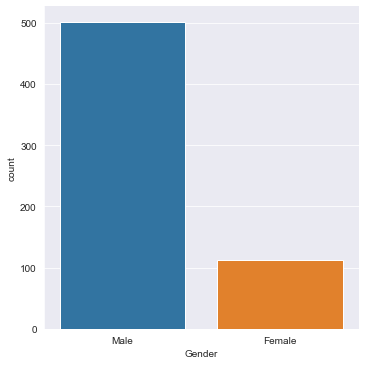

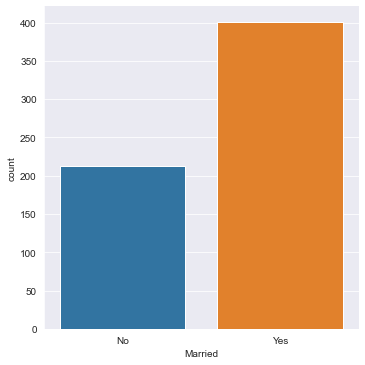

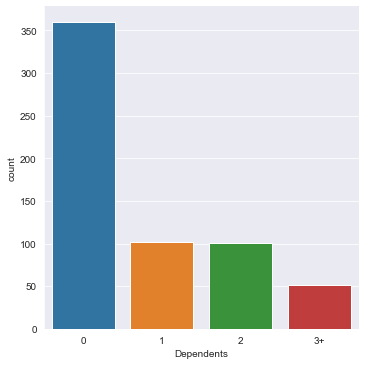

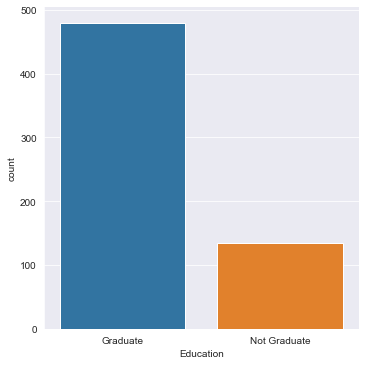

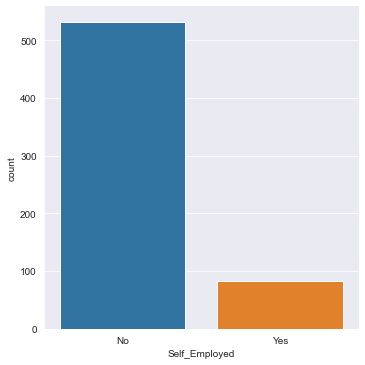

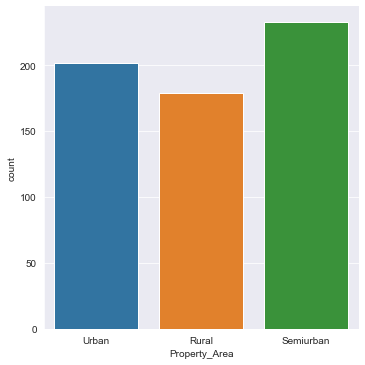

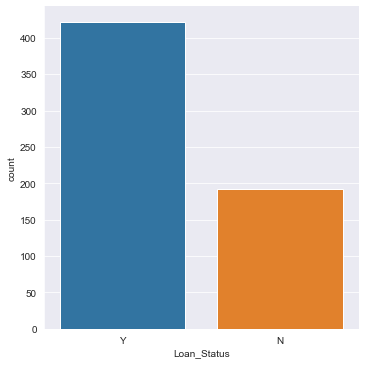

In [20]:
for i in categorical_columns:
    sns.catplot(x=i,data=df_train,kind='count')

In [21]:
pd.crosstab(df_train.Loan_Status,df_train.Gender,normalize="columns")

Gender,Female,Male
Loan_Status,,
N,0.330357,0.308765
Y,0.669643,0.691235


In [22]:
pd.crosstab(df_train.Gender,df_train.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


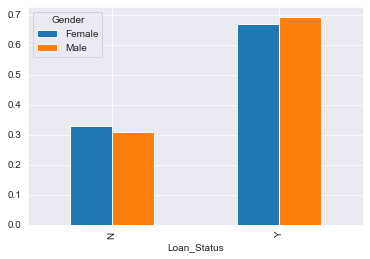

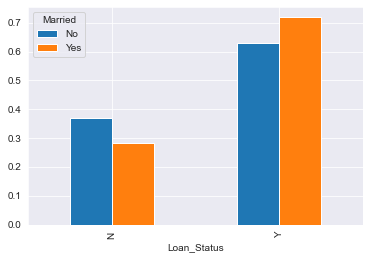

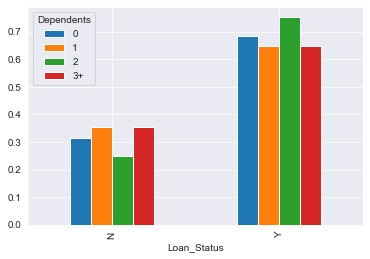

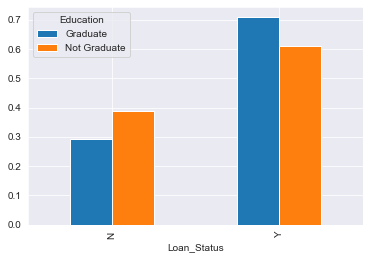

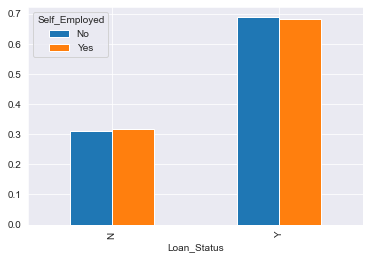

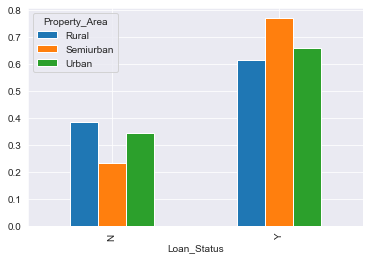

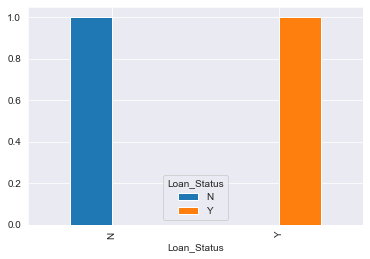

In [23]:
for i in categorical_columns:
   pd.crosstab(df_train.Loan_Status,df_train[i],normalize="columns").plot.bar()

In [24]:
pd.crosstab(df_train.Loan_Status,df_train["Credit_History"],normalize="columns")

Credit_History,0.0,1.0
Loan_Status,,
N,0.921348,0.209524
Y,0.078652,0.790476


<AxesSubplot:xlabel='Loan_Status'>

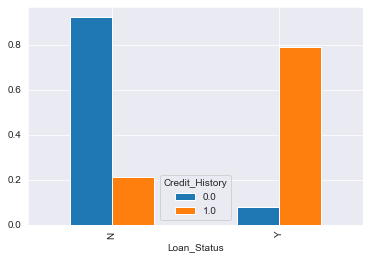

In [25]:
pd.crosstab(df_train.Loan_Status,df_train["Credit_History"],normalize="columns").plot.bar()

In [26]:
numerical_columns=[i for i in df_train.columns if i not in categorical_columns]

In [27]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<AxesSubplot:>

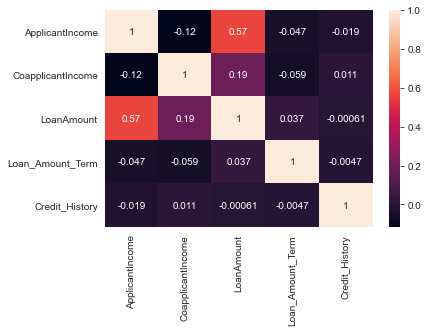

In [28]:
sns.heatmap(df_train.corr(),annot=True)

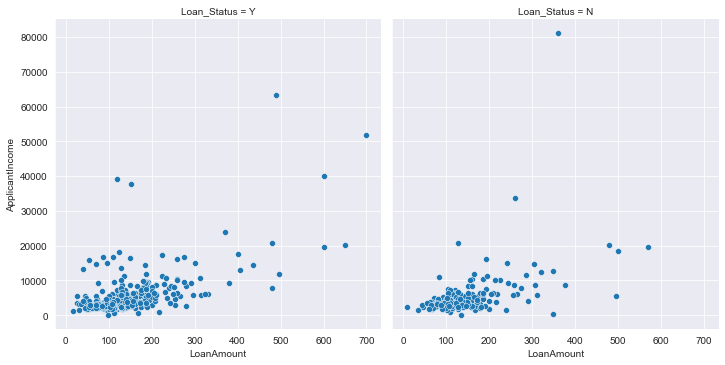

In [29]:
sns.set_style("darkgrid")
sns.relplot(x="LoanAmount",y="ApplicantIncome",data=df_train,col="Loan_Status")

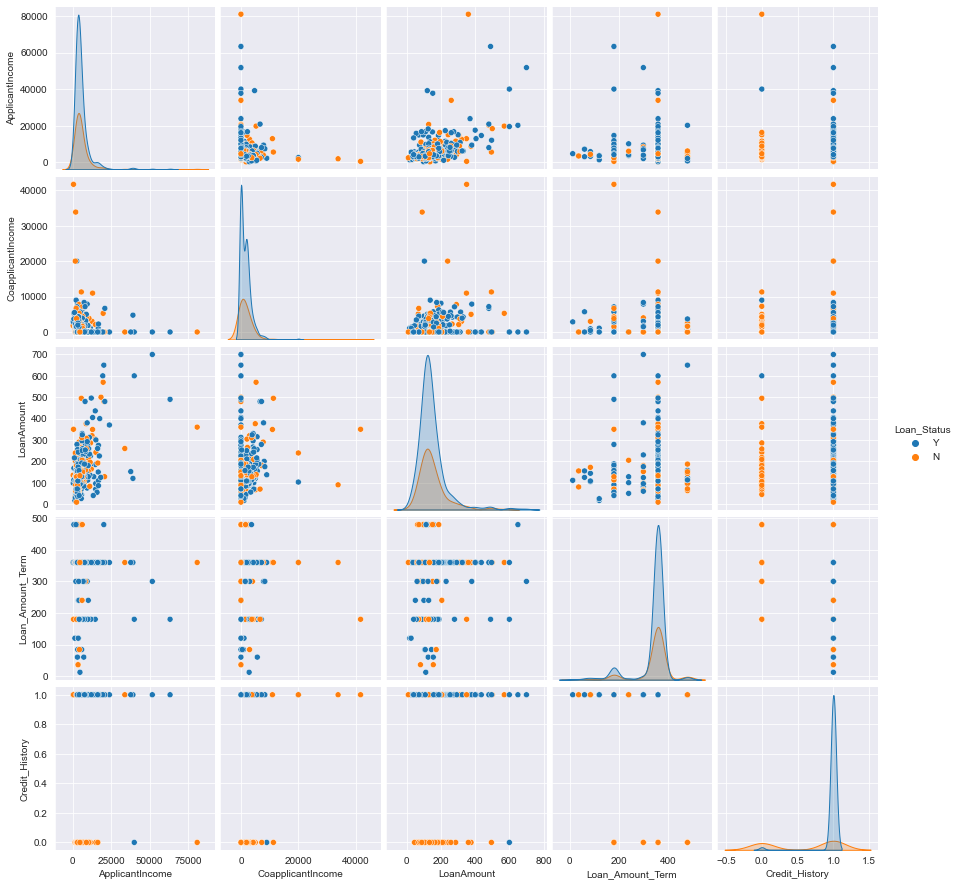

In [30]:
sns.pairplot(data=df_train, hue="Loan_Status")

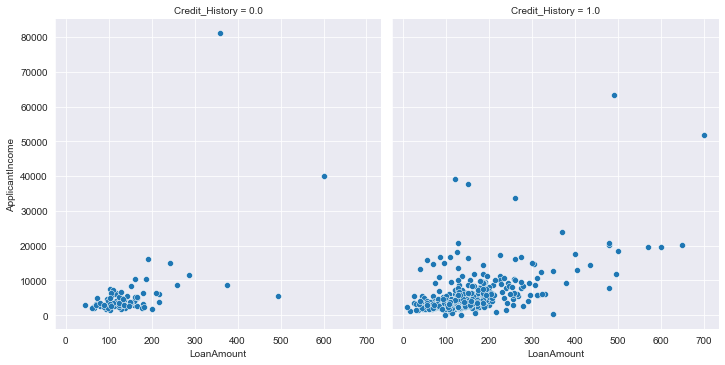

In [31]:
sns.relplot(x="LoanAmount",y="ApplicantIncome",data=df_train,col="Credit_History")

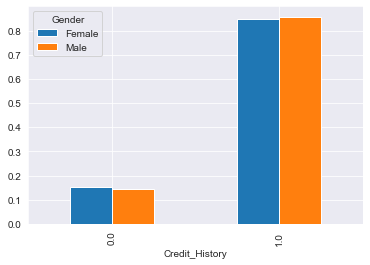

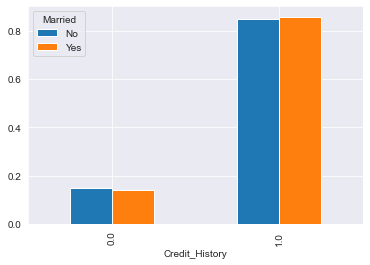

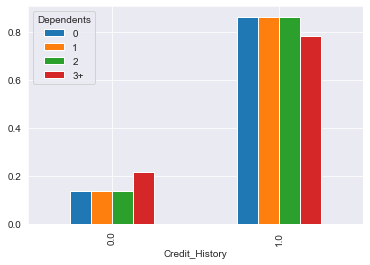

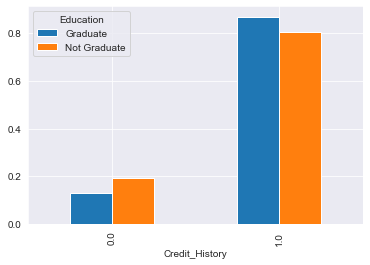

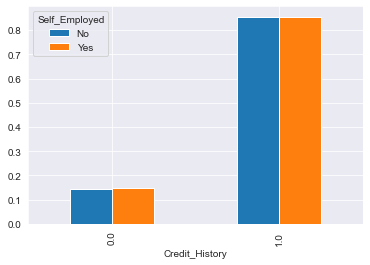

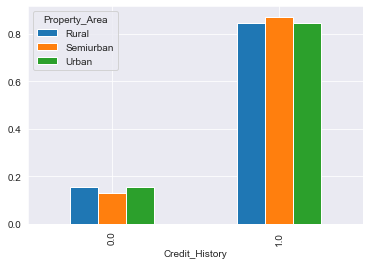

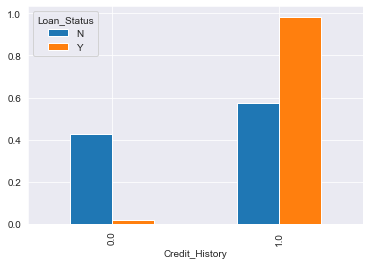

In [32]:
for i in categorical_columns:
   pd.crosstab(df_train.Credit_History,df_train[i],normalize="columns").plot.bar()

In [33]:
sns.__version__

'0.11.1'

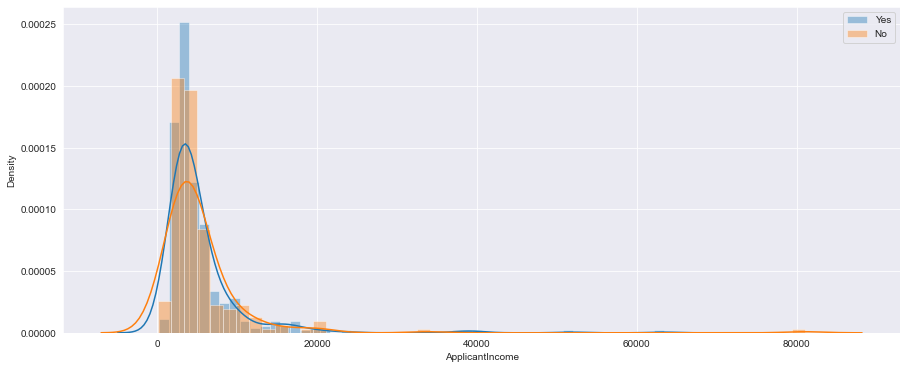

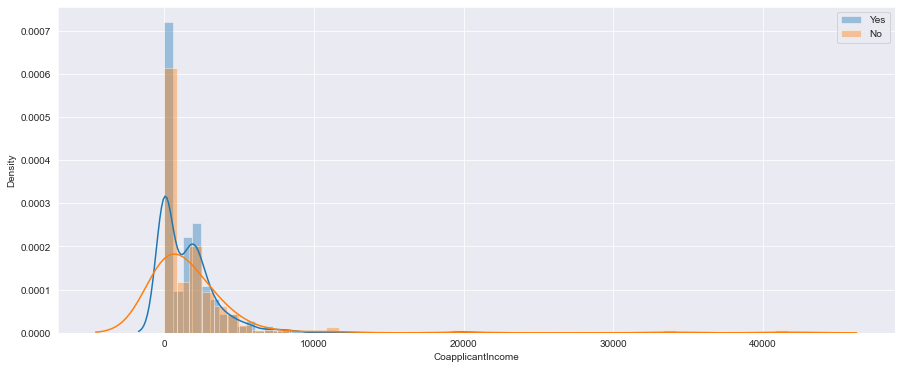

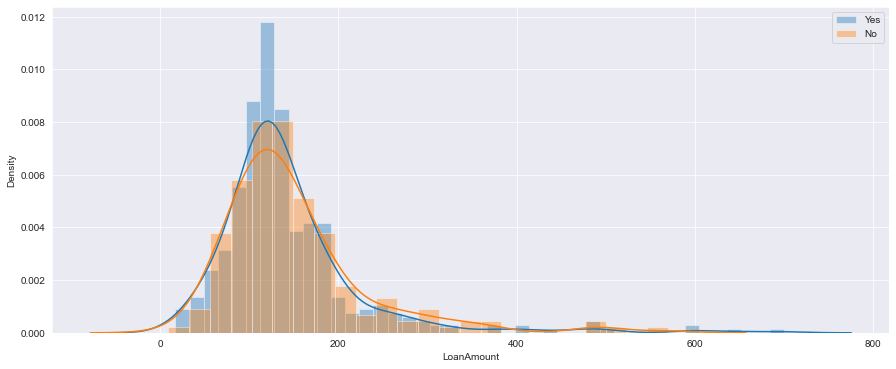

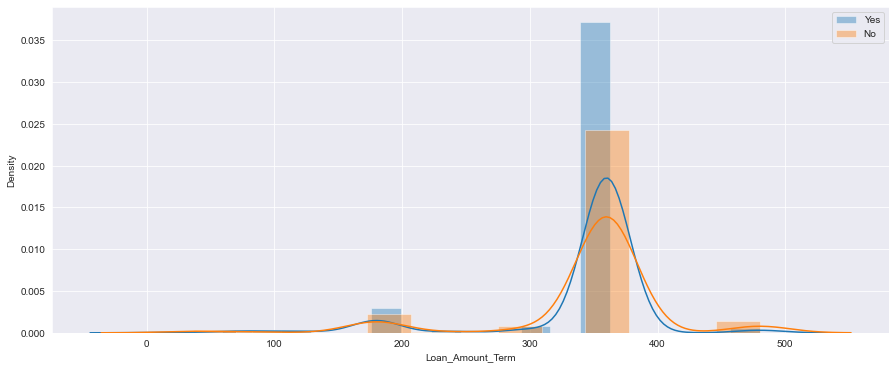

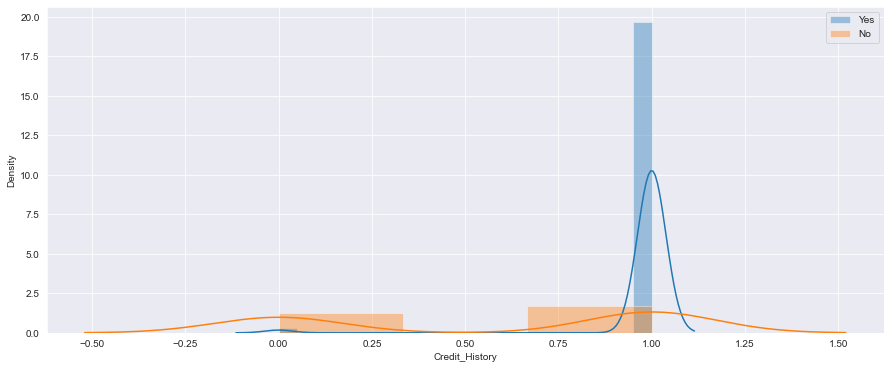

In [34]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df_train[df_train["Loan_Status"]=="Y"][i],label="Yes")
    sns.distplot(df_train[df_train["Loan_Status"]=="N"][i],label="No")
    plt.legend()

In [35]:
df_train["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
pd.crosstab(df_train.Loan_Status,columns=[df_train["Loan_Amount_Term"],df_train["Credit_History"]],normalize="columns")

Loan_Amount_Term 12.0  36.0  60.0  84.0  120.0 180.0           240.0 300.0  \
Credit_History     1.0   1.0   1.0   1.0   1.0   0.0       1.0   1.0   0.0   
Loan_Status                                                                  
N                  0.0   1.0   0.0  0.25   0.0   0.8  0.205882  0.25   1.0   
Y                  1.0   0.0   1.0  0.75   1.0   0.2  0.794118  0.75   0.0   

Loan_Amount_Term          360.0           480.0            
Credit_History    1.0       0.0       1.0   0.0       1.0  
Loan_Status                                                
N                 0.2  0.930556  0.202643   1.0  0.454545  
Y                 0.8  0.069444  0.797357   0.0  0.545455

In [37]:
df_train.groupby("Loan_Status")[numerical_columns[:-1]].median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,128.0,360.0
Y,3812.5,1239.5,128.0,360.0


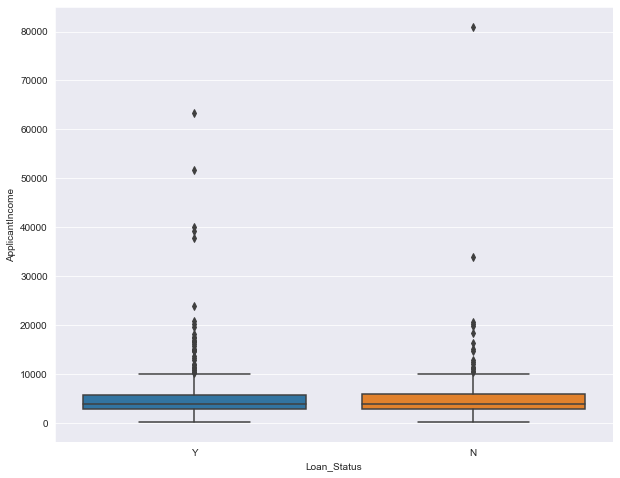

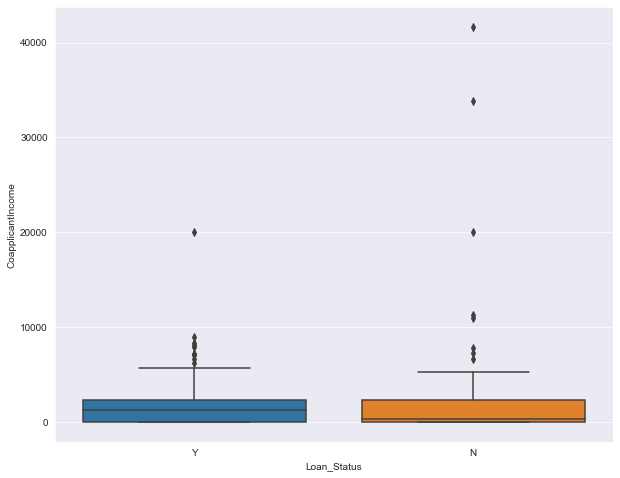

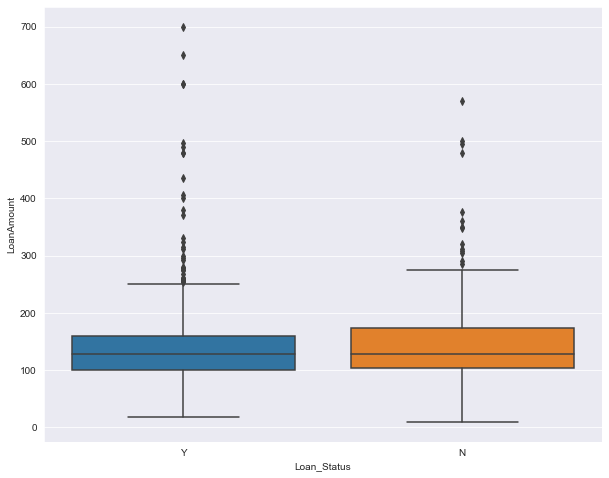

In [38]:
for i in numerical_columns[:-2]:
    plt.figure(figsize=(10,8))
    sns.boxplot(x="Loan_Status", y=i, data=df_train)

In [39]:
pd.crosstab(df_train.Loan_Status,columns=[df_train["Credit_History"],df_train["Property_Area"],df_train["Married"],df_train["Education"]],normalize="columns")

Credit_History       0.0                                                \
Property_Area      Rural                                     Semiurban   
Married               No                    Yes                     No   
Education       Graduate Not Graduate  Graduate Not Graduate  Graduate   
Loan_Status                                                              
N               0.857143          1.0  0.923077          1.0  0.833333   
Y               0.142857          0.0  0.076923          0.0  0.166667   

Credit_History                                                         ...  \
Property_Area                            Urban                         ...   
Married              Yes                    No                    Yes  ...   
Education       Graduate Not Graduate Graduate Not Graduate  Graduate  ...   
Loan_Status                                                            ...   
N               0.916667     0.833333      1.0          1.0  0.916667  ...   
Y               0.083333     0.166667      0.0          0.0  0.083333  ...   

Credit_History       1.0                                                \
Property_Area      Rural              Semiurban                          
Married              Yes                     No                    Yes   
Education       Graduate Not Graduate  Graduate Not Graduate  Graduate   
Loan_Status                                                              
N               0.236111     0.333333  0.215686     0.176471  0.098214   
Y               0.763889     0.666667  0.784314     0.823529  0.901786   

Credit_History                                                             
Property_Area                   Urban                                      
Married                            No                    Yes               
Education      Not Graduate  Graduate Not Graduate  Graduate Not Graduate  
Loan_Status                                                                
N                  0.130435  0.307692     0.333333  0.175824     0.227273  
Y                  0.869565  0.692308     0.666667  0.824176     0.772727  

[2 rows x 23 columns]

In [40]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
df_train["Dependents"].value_counts(normalize=True)

0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64

In [42]:
pd.crosstab(index=df_train["Loan_Status"],columns=df_train["Dependents"],normalize="columns")

Dependents,0,1,2,3+
Loan_Status,,,,
N,0.313889,0.352941,0.247525,0.352941
Y,0.686111,0.647059,0.752475,0.647059


In [43]:
df_train["Property_Area"].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

In [44]:
pd.crosstab(index=df_train["Loan_Status"],columns=df_train["Property_Area"],normalize="columns")

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


In [45]:
pd.crosstab(index=df_train["Property_Area"],columns=[df_train["Married"],df_train["Education"],df_train["Gender"]],normalize="columns")

Married              No                                        Yes            \
Education      Graduate           Not Graduate            Graduate             
Gender           Female      Male       Female      Male    Female      Male   
Property_Area                                                                  
Rural          0.227273  0.303922     0.285714  0.419355  0.115385  0.286713   
Semiurban      0.424242  0.343137     0.428571  0.354839  0.653846  0.374126   
Urban          0.348485  0.352941     0.285714  0.225806  0.230769  0.339161   

Married                               
Education     Not Graduate            
Gender              Female      Male  
Property_Area                         
Rural             0.333333  0.349398  
Semiurban         0.666667  0.301205  
Urban             0.000000  0.349398

In [46]:
pd.crosstab(index=df_train["Credit_History"],columns=df_train["Property_Area"],normalize="columns")

Property_Area,Rural,Semiurban,Urban
Credit_History,,,
0.0,0.156425,0.128755,0.153465
1.0,0.843575,0.871245,0.846535


In [47]:
df_train['Self_Employed'].value_counts(normalize=True)

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64

In [48]:
pd.crosstab(index=df_train["Dependents"],columns=df_train["Self_Employed"],normalize="columns")

Self_Employed,No,Yes
Dependents,,
0,0.603383,0.475610
1,0.154135,0.243902
2,0.159774,0.195122
3+,0.082707,0.085366


In [49]:
x1=np.log(df_train["LoanAmount"])

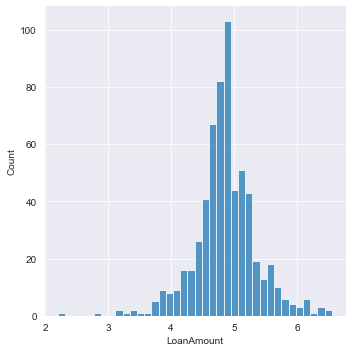

In [50]:
sns.displot(x1)

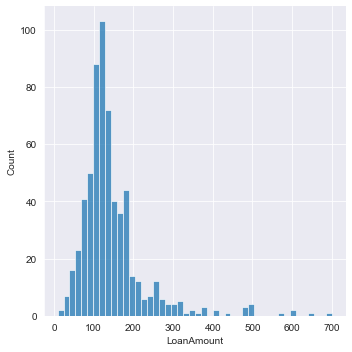

In [51]:
sns.displot(df_train["LoanAmount"])

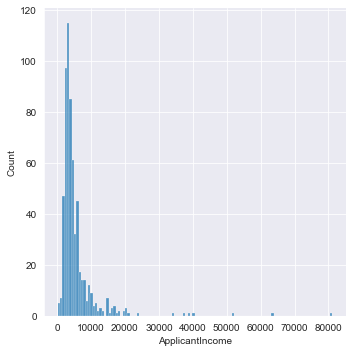

In [52]:
sns.displot(df_train["ApplicantIncome"])

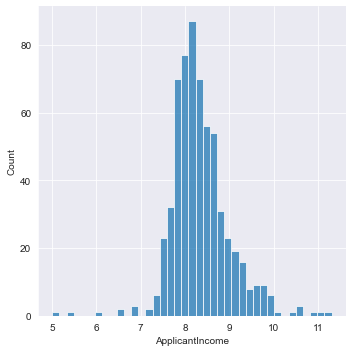

In [53]:
sns.displot(np.log(df_train["ApplicantIncome"]))

In [54]:
df_train[["ApplicantIncome","CoapplicantIncome"]].corr()

,ApplicantIncome,CoapplicantIncome
ApplicantIncome,1.000000,-0.116605
CoapplicantIncome,-0.116605,1.000000


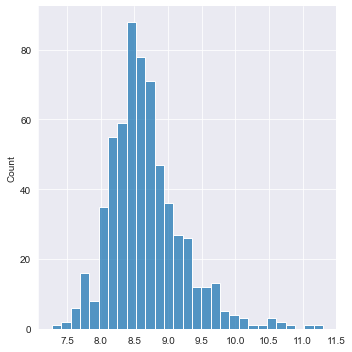

In [55]:
sns.displot(np.log(df_train["ApplicantIncome"]+df_train["CoapplicantIncome"]))

In [56]:
df_train["Combine"]=np.log(df_train["ApplicantIncome"]+df_train["CoapplicantIncome"])

<AxesSubplot:xlabel='Loan_Status', ylabel='Combine'>

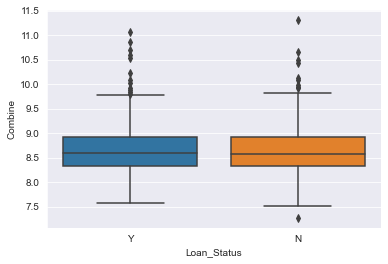

In [57]:
sns.boxplot(x="Loan_Status",y="Combine",data=df_train)

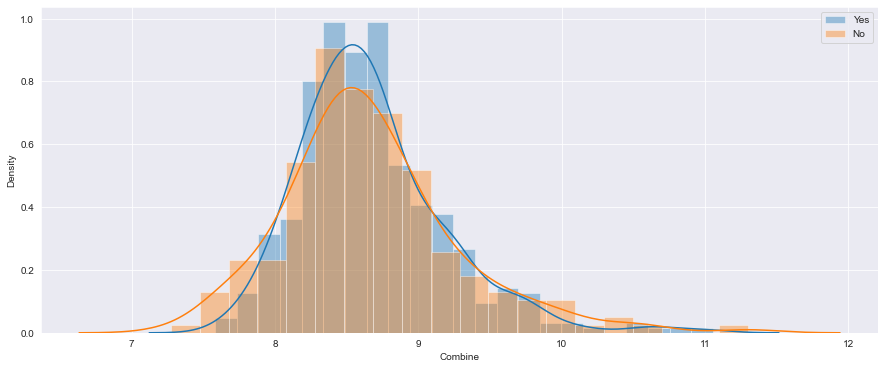

In [58]:
plt.figure(figsize=(15,6))
sns.distplot(df_train[df_train["Loan_Status"]=="Y"]["Combine"],label="Yes")
sns.distplot(df_train[df_train["Loan_Status"]=="N"]["Combine"],label="No")
plt.legend()

In [59]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combine
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515


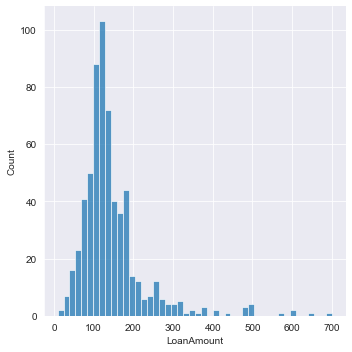

In [60]:
sns.displot(df_train["LoanAmount"])

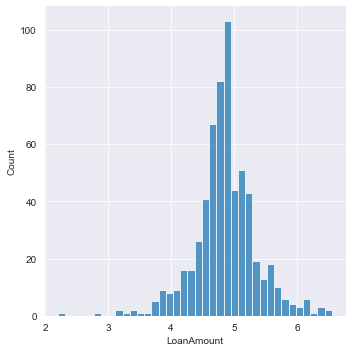

In [61]:
sns.displot(np.log(df_train["LoanAmount"]))

In [62]:
df_train[["Combine","LoanAmount"]].corr()

,Combine,LoanAmount
Combine,1.000000,0.687825
LoanAmount,0.687825,1.000000


<AxesSubplot:xlabel='LoanAmount', ylabel='Combine'>

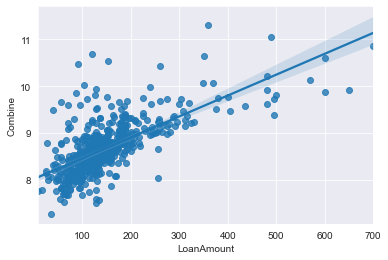

In [63]:
sns.regplot(x="LoanAmount",y="Combine",data=df_train)

<AxesSubplot:xlabel='LoanAmount', ylabel='Combine'>

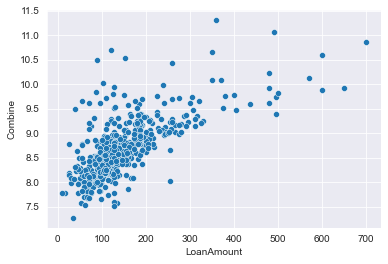

In [64]:
sns.scatterplot(x="LoanAmount",y="Combine",data=df_train)

In [65]:
df_train[["Combine","LoanAmount"]].describe()

,Combine,LoanAmount
count,614.000000,614.000000
mean,8.669414,145.752443
std,0.545102,84.107233
min,7.273786,9.000000
25%,8.334712,100.250000
50%,8.597205,128.000000
75%,8.925549,164.750000
max,11.302204,700.000000


In [66]:
df_train["LoanAmount"]=np.log(df_train["LoanAmount"])

In [67]:
df_train[["Combine","LoanAmount"]].describe()

,Combine,LoanAmount
count,614.000000,614.000000
mean,8.669414,4.857250
std,0.545102,0.495996
min,7.273786,2.197225
25%,8.334712,4.607658
50%,8.597205,4.852030
75%,8.925549,5.104426
max,11.302204,6.551080


<AxesSubplot:xlabel='LoanAmount', ylabel='Combine'>

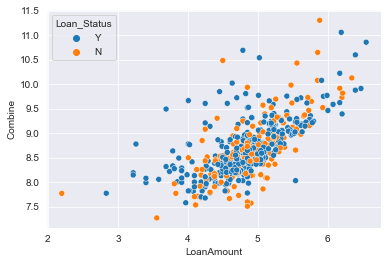

In [68]:
sns.scatterplot(x="LoanAmount",y="Combine",data=df_train,hue="Loan_Status")

In [69]:
df_train[["Combine","LoanAmount"]].corr()

,Combine,LoanAmount
Combine,1.000000,0.659319
LoanAmount,0.659319,1.000000


In [70]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combine
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y,8.699515


In [71]:
df_train.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

In [72]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combine
0,Male,No,0,Graduate,No,4.852030,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,Y,8.699515


In [73]:
df_train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [74]:
X=df_train[[i for i in df_train.columns if i!="Loan_Status"]]

In [75]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combine
0,Male,No,0,Graduate,No,4.852030,360.0,1.0,Urban,8.674026
1,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,8.505323
4,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,8.699515


In [76]:
y=df_train["Loan_Status"]

In [77]:
from sklearn.model_selection import train_test_split as tts

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtc=DecisionTreeClassifier(max_depth=15)

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le=LabelEncoder()

In [82]:
X["Gender"]=le.fit_transform(X["Gender"])
X["Married"]=le.fit_transform(X["Married"])
X["Education"]=le.fit_transform(X["Education"])
X["Self_Employed"]=le.fit_transform(X["Self_Employed"])
X["Property_Area"]=le.fit_transform(X["Property_Area"])

In [83]:
X["Dependents"]=le.fit_transform(X["Dependents"])

In [84]:
y=le.fit_transform(y)

In [85]:
le.classes_

array(['N', 'Y'], dtype=object)

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
ohe=OneHotEncoder(drop="first")

In [88]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.25,stratify=y)

In [89]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [90]:
y_pred=dtc.predict(X_test)

In [91]:
dtc.score(X_test,y_test)

0.6948051948051948

In [92]:
dtc.score(X_train,y_train)

0.9826086956521739

In [93]:
from sklearn.metrics import classification_report

In [94]:
for i in classification_report(y_test,y_pred).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       0.51      0.56      0.53        48
           1       0.79      0.75      0.77       106

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.69      0.70       154



In [95]:
dtc.feature_importances_

array([0.02105619, 0.01683483, 0.01067553, 0.00393305, 0.03186271,
       0.18330264, 0.04475351, 0.34191487, 0.06758421, 0.27808245])

In [96]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Combine'],
      dtype='object')

In [97]:
F_imp=dict(list(zip(X.columns,dtc.feature_importances_)))

In [98]:
S=pd.DataFrame(data=F_imp.values(),index=F_imp.keys(),columns=["Score"])

In [99]:
S.head()

,Score
Gender,0.021056
Married,0.016835
Dependents,0.010676
Education,0.003933
Self_Employed,0.031863


<AxesSubplot:>

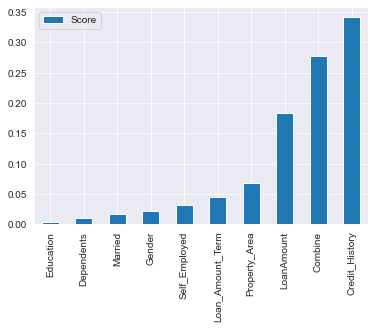

In [100]:
S.sort_values(by="Score").plot.bar()

In [162]:
dtc_1=DecisionTreeClassifier(max_depth=10)

In [163]:
dtc_1.fit(X_train.drop(["Gender","Married","Self_Employed"],axis=1),y_train)

DecisionTreeClassifier(max_depth=10)

In [164]:
y_pred1=dtc_1.predict(X_test.drop(["Gender","Married","Self_Employed"],axis=1))

In [165]:
dtc_1.score(X_train.drop(["Gender","Married","Self_Employed"],axis=1),y_train)

0.9239130434782609

In [166]:
dtc_1.score(X_test.drop(["Gender","Married","Self_Employed"],axis=1),y_test)

0.7142857142857143

In [167]:
for i in classification_report(y_test,y_pred1).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       0.55      0.50      0.52        48
           1       0.78      0.81      0.80       106

    accuracy                           0.71       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.71      0.71      0.71       154



In [168]:
dtc_1.get_depth()

10

<AxesSubplot:>

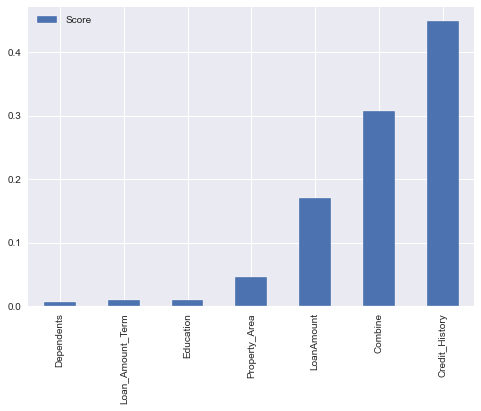

In [169]:
F_imp=dict(list(zip(X.drop(["Gender","Married","Self_Employed"],axis=1).columns,dtc_1.feature_importances_)))
S=pd.DataFrame(data=F_imp.values(),index=F_imp.keys(),columns=["Score"])
S.sort_values(by="Score").plot.bar()

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
lr=LogisticRegression()

In [110]:
lr.fit(X_train.drop(["Gender","Married","Self_Employed"],axis=1),y_train)

LogisticRegression()

In [111]:
y_lr=lr.predict(X_test.drop(["Gender","Married","Self_Employed"],axis=1))

In [112]:
lr.score(X_train.drop(["Gender","Married","Self_Employed"],axis=1),y_train)

0.8173913043478261

In [113]:
lr.score(X_test.drop(["Gender","Married","Self_Employed"],axis=1),y_test)

0.7857142857142857

In [114]:
for i in classification_report(y_test,y_lr).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       0.86      0.38      0.52        48
           1       0.77      0.97      0.86       106

    accuracy                           0.79       154
   macro avg       0.82      0.67      0.69       154
weighted avg       0.80      0.79      0.76       154



<AxesSubplot:>

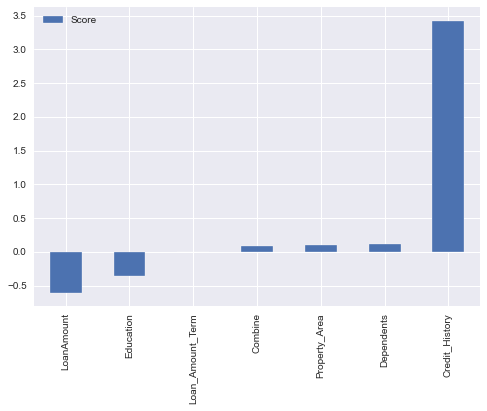

In [170]:
F_imp=dict(list(zip(X.drop(["Gender","Married","Self_Employed"],axis=1).columns,lr.coef_[0])))
S=pd.DataFrame(data=F_imp.values(),index=F_imp.keys(),columns=["Score"])
S.sort_values(by="Score").plot.bar()

In [116]:
lr.predict(X_test.drop(["Gender","Married","Self_Employed"],axis=1))

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [118]:
lr.predict_proba(X_test.drop(["Gender","Married","Self_Employed"],axis=1))

array([[0.2601083 , 0.7398917 ],
       [0.24406401, 0.75593599],
       [0.21015333, 0.78984667],
       [0.16620105, 0.83379895],
       [0.8893917 , 0.1106083 ],
       [0.17866888, 0.82133112],
       [0.8724647 , 0.1275353 ],
       [0.88676686, 0.11323314],
       [0.20214704, 0.79785296],
       [0.21657955, 0.78342045],
       [0.22891377, 0.77108623],
       [0.2286019 , 0.7713981 ],
       [0.13877615, 0.86122385],
       [0.15864375, 0.84135625],
       [0.19084655, 0.80915345],
       [0.87366395, 0.12633605],
       [0.32386687, 0.67613313],
       [0.87763609, 0.12236391],
       [0.90133502, 0.09866498],
       [0.91003131, 0.08996869],
       [0.28254021, 0.71745979],
       [0.21256705, 0.78743295],
       [0.25252894, 0.74747106],
       [0.05121382, 0.94878618],
       [0.27843863, 0.72156137],
       [0.28464594, 0.71535406],
       [0.124991  , 0.875009  ],
       [0.20436899, 0.79563101],
       [0.20126751, 0.79873249],
       [0.22322217, 0.77677783],
       [0.

In [119]:
from sklearn.metrics import roc_auc_score,roc_curve

In [120]:
fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1], pos_label=1)

In [121]:
fpr2, tpr2, thresh2 = roc_curve(y_test, dtc_1.predict_proba(X_test.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1], pos_label=1)

In [122]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

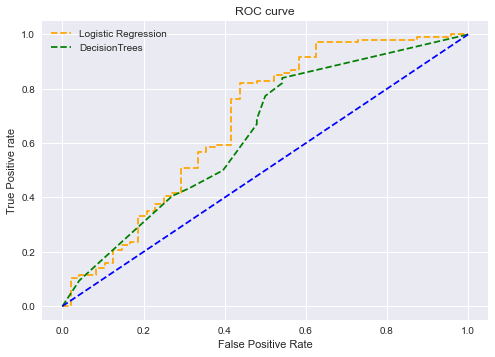

In [123]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DecisionTrees')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [124]:
roc_auc_score(y_test, lr.predict_proba(X_test.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1])

0.6812106918238994

In [125]:
roc_auc_score(y_test, dtc_1.predict_proba(X_test.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1])

0.6344339622641509

In [126]:
np.median(tpr1)

0.5377358490566038

In [127]:
y_new=[]
for i in  lr.predict_proba(X_test.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1]:
    if i>0.6084905660377358:
        y_new.append(1)
    else:
        y_new.append(0)

In [128]:
for i in classification_report(y_test,y_new).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       0.86      0.38      0.52        48
           1       0.77      0.97      0.86       106

    accuracy                           0.79       154
   macro avg       0.82      0.67      0.69       154
weighted avg       0.80      0.79      0.76       154



In [129]:
np.median(tpr2)

0.6698113207547169

In [136]:
y_new1=[]
for i in  dtc_1.predict_proba(X_test.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1]:
    if i>0.5698113207547169:
        y_new1.append(1)
    else:
        y_new1.append(0)

In [137]:
for i in classification_report(y_test,y_new1).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        48
           1       0.77      0.77      0.77       106

    accuracy                           0.69       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.69      0.69      0.69       154



In [138]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combine
0,1,0,0,0,0,4.852030,360.0,1.0,2,8.674026
1,1,1,1,0,0,4.852030,360.0,1.0,0,8.714568
2,1,1,0,0,1,4.189655,360.0,1.0,2,8.006368
3,1,1,0,1,0,4.787492,360.0,1.0,2,8.505323
4,1,0,0,0,0,4.948760,360.0,1.0,2,8.699515


In [174]:
X["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [172]:
X["Loan_Amount_Term"].value_counts(normalize=True)

360.0    0.856678
180.0    0.071661
480.0    0.024430
300.0    0.021173
84.0     0.006515
240.0    0.006515
120.0    0.004886
36.0     0.003257
60.0     0.003257
12.0     0.001629
Name: Loan_Amount_Term, dtype: float64

In [173]:
pd.crosstab(index=df_train["Loan_Status"],columns=df_train["Loan_Amount_Term"],normalize="columns")

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Loan_Status,,,,,,,,,,
N,0.0,1.0,0.0,0.25,0.0,0.340909,0.25,0.384615,0.302281,0.6
Y,1.0,0.0,1.0,0.75,1.0,0.659091,0.75,0.615385,0.697719,0.4


In [175]:
X=pd.get_dummies(X,columns=["Dependents","Property_Area"],drop_first=True)

In [176]:
X.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Combine,Dependents_1,Dependents_2,Dependents_3,Property_Area_1,Property_Area_2
0,1,0,0,0,4.852030,360.0,1.0,8.674026,0,0,0,0,1
1,1,1,0,0,4.852030,360.0,1.0,8.714568,1,0,0,0,0
2,1,1,0,1,4.189655,360.0,1.0,8.006368,0,0,0,0,1
3,1,1,1,0,4.787492,360.0,1.0,8.505323,0,0,0,0,1
4,1,0,0,0,4.948760,360.0,1.0,8.699515,0,0,0,0,1


In [177]:
Loan_Term=[]
for i in X["Loan_Amount_Term"]:
    if i==360.0:
        Loan_Term.append(1)
    else:
        Loan_Term.append(0)

In [179]:
X["Loan_Amount_Term"]=Loan_Term

In [180]:
X.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Combine,Dependents_1,Dependents_2,Dependents_3,Property_Area_1,Property_Area_2
0,1,0,0,0,4.852030,1,1.0,8.674026,0,0,0,0,1
1,1,1,0,0,4.852030,1,1.0,8.714568,1,0,0,0,0
2,1,1,0,1,4.189655,1,1.0,8.006368,0,0,0,0,1
3,1,1,1,0,4.787492,1,1.0,8.505323,0,0,0,0,1
4,1,0,0,0,4.948760,1,1.0,8.699515,0,0,0,0,1


In [181]:
X_tr,X_te,y_tr,y_te=tts(X,y,test_size=0.25,stratify=y)

In [182]:
Log_reg=LogisticRegression()

In [183]:
Log_reg.fit(X_tr,y_tr)

LogisticRegression()

In [184]:
y_log=Log_reg.predict(X_te)

In [185]:
Log_reg.score(X_tr,y_tr)

0.8

In [186]:
Log_reg.score(X_te,y_te)

0.8376623376623377

In [187]:
for i in classification_report(y_te,y_log).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        48
           1       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154



In [189]:
roc_auc_score(y_te,Log_reg.predict_proba(X_te)[:, 1])

0.7783018867924528

In [190]:
fpr1, tpr1, thresh1 = roc_curve(y_te,Log_reg.predict_proba(X_te)[:, 1], pos_label=1)

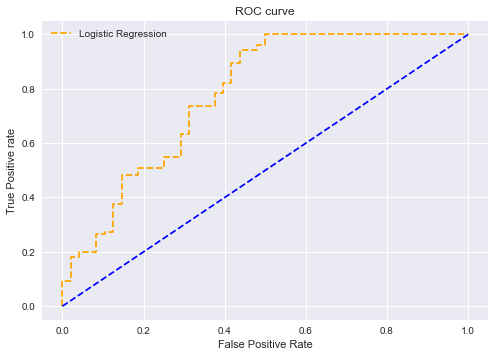

In [191]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DecisionTrees')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [192]:
np.median(tpr1)

0.5283018867924528

In [193]:
y_new=[]
for i in Log_reg.predict_proba(X_te)[:, 1]:
    if i>0.5283018867924528:
        y_new.append(1)
    else:
        y_new.append(0)

In [194]:
for i in classification_report(y_te,y_new).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        48
           1       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154



<AxesSubplot:>

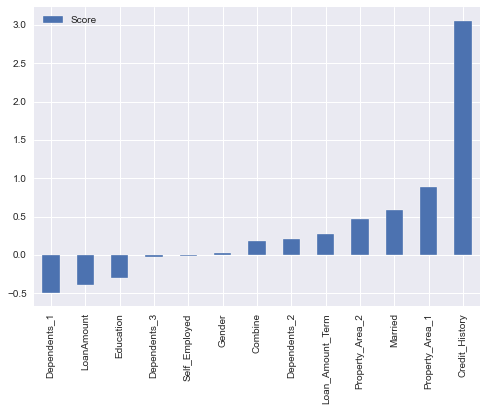

In [195]:
F_imp=dict(list(zip(X.columns,Log_reg.coef_[0])))
S=pd.DataFrame(data=F_imp.values(),index=F_imp.keys(),columns=["Score"])
S.sort_values(by="Score").plot.bar()

In [239]:
D_1=DecisionTreeClassifier(max_depth=5)

In [240]:
D_1.fit(X_tr,y_tr)

DecisionTreeClassifier(max_depth=5)

In [241]:
y_dt=D_1.predict(X_te)

In [242]:
D_1.score(X_tr,y_tr)

0.8478260869565217

In [244]:
D_1.score(X_te,y_te)

0.8051948051948052

In [243]:
for i in classification_report(y_te,y_dt).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       0.85      0.46      0.59        48
           1       0.80      0.96      0.87       106

    accuracy                           0.81       154
   macro avg       0.82      0.71      0.73       154
weighted avg       0.81      0.81      0.79       154



In [245]:
roc_auc_score(y_te,D_1.predict_proba(X_te)[:, 1])

0.6710888364779874

In [246]:
fpr2, tpr2, thresh2 = roc_curve(y_te,D_1.predict_proba(X_te)[:, 1], pos_label=1)

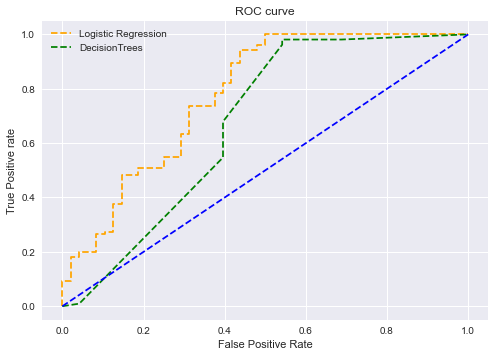

In [247]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DecisionTrees')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

<AxesSubplot:>

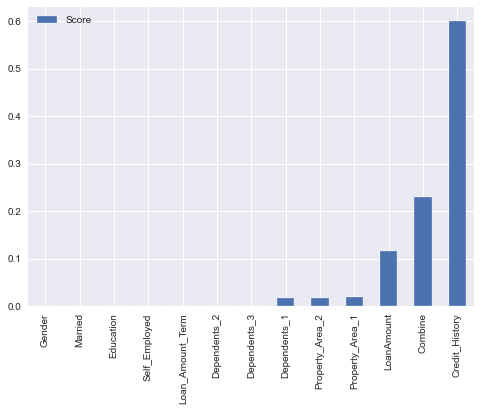

In [248]:
F_imp=dict(list(zip(X.columns,D_1.feature_importances_)))
S=pd.DataFrame(data=F_imp.values(),index=F_imp.keys(),columns=["Score"])
S.sort_values(by="Score").plot.bar()

In [299]:
D_2=DecisionTreeClassifier(max_depth=10)

In [300]:
D_2.fit(X_tr.drop(["Gender","Married","Self_Employed"],axis=1),y_tr)

DecisionTreeClassifier(max_depth=10)

In [301]:
D_2.score(X_tr.drop(["Gender","Married","Self_Employed"],axis=1),y_tr)

0.9195652173913044

In [302]:
for i in classification_report(y_te,D_2.predict(X_te.drop(["Gender","Married","Self_Employed"],axis=1))).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       0.77      0.50      0.61        48
           1       0.80      0.93      0.86       106

    accuracy                           0.80       154
   macro avg       0.79      0.72      0.74       154
weighted avg       0.80      0.80      0.78       154



In [298]:
D_2.get_depth()

10

<AxesSubplot:>

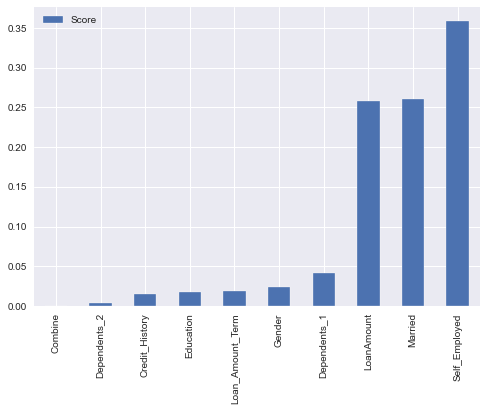

In [280]:
F_imp=dict(list(zip(X.columns,D_2.feature_importances_)))
S=pd.DataFrame(data=F_imp.values(),index=F_imp.keys(),columns=["Score"])
S.sort_values(by="Score").plot.bar()

In [303]:
l_2=LogisticRegression()

In [304]:
l_2.fit(X_tr.drop(["Gender","Married","Self_Employed"],axis=1),y_tr)

LogisticRegression()

In [305]:
D_2.score(X_tr.drop(["Gender","Married","Self_Employed"],axis=1),y_tr)

0.9195652173913044

In [306]:
for i in classification_report(y_te,l_2.predict(X_te.drop(["Gender","Married","Self_Employed"],axis=1))).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        48
           1       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154



In [308]:
roc_auc_score(y_te,l_2.predict_proba(X_te.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1])

0.7712264150943396

In [311]:
fpr1, tpr1, thresh1 = roc_curve(y_te,l_2.predict_proba(X_te.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1], pos_label=1)

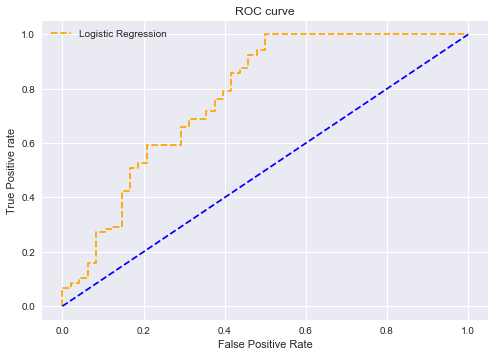

In [312]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DecisionTrees')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [313]:
np.median(tpr1)

0.5613207547169812

In [316]:
y_new=[]
for i in l_2.predict_proba(X_te.drop(["Gender","Married","Self_Employed"],axis=1))[:, 1]:
    if i>0.5613207547169812:
        y_new.append(1)
    else:
        y_new.append(0)

In [317]:
for i in classification_report(y_te,y_new).split("\n"):
    print(i)

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        48
           1       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154



<AxesSubplot:>

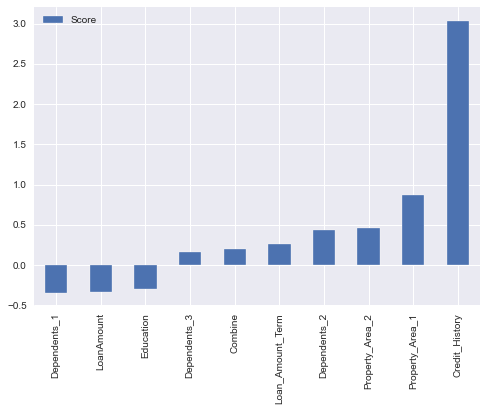

In [318]:
F_imp=dict(list(zip(X.drop(["Gender","Married","Self_Employed"],axis=1).columns,l_2.coef_[0])))
S=pd.DataFrame(data=F_imp.values(),index=F_imp.keys(),columns=["Score"])
S.sort_values(by="Score").plot.bar()

In [320]:
X["Loan_Amount_Term"].value_counts(normalize=True)

1    0.856678
0    0.143322
Name: Loan_Amount_Term, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

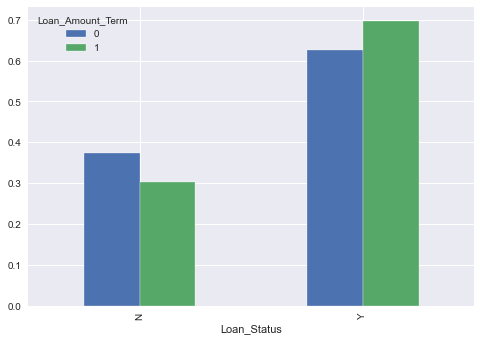

In [324]:
pd.crosstab(index=df_train["Loan_Status"],columns=X["Loan_Amount_Term"],normalize="columns").plot.bar()

In [325]:
pd.crosstab(index=df_train["Loan_Status"],columns=X["Loan_Amount_Term"],normalize="columns")

Loan_Amount_Term,0,1
Loan_Status,,
N,0.375,0.302281
Y,0.625,0.697719
